# Canonical Correlation Analysis (CCA) 

In [21]:
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [43]:
df = pd.read_stata('F:/D-drive/Brur/Academic/5.1/Siddik sir/Raka_Assignment/Lecture 2- cc/mmreg.dta')
print(df)

        id  locus_of_control  self_concept  motivation       read      write  \
0    303.0             -0.84         -0.24        1.00  54.799999  64.500000   
1    404.0             -0.38         -0.47        0.67  62.700001  43.700001   
2    225.0              0.89          0.59        0.67  60.599998  56.700001   
3    553.0              0.71          0.28        0.67  62.700001  56.700001   
4    433.0             -0.64          0.03        1.00  41.599998  46.299999   
..     ...               ...           ...         ...        ...        ...   
595  464.0              0.94         -0.30        1.00  60.099998  67.099998   
596  291.0              0.23          0.03        1.00  65.400002  56.700001   
597  348.0              0.46          0.03        1.00  65.400002  51.500000   
598  193.0              0.51          0.03        1.00  54.799999  54.099998   
599  380.0              0.25          0.03        0.67  49.500000  51.500000   

          math    science  female  
0  

# Separate the two variable groups

In [44]:
# Psychological variables
X = df[['locus_of_control', 'self_concept', 'motivation']]
# Academic variables
Y = df[['read', 'write', 'math', 'science']]
print (X) 
print (Y)

     locus_of_control  self_concept  motivation
0               -0.84         -0.24        1.00
1               -0.38         -0.47        0.67
2                0.89          0.59        0.67
3                0.71          0.28        0.67
4               -0.64          0.03        1.00
..                ...           ...         ...
595              0.94         -0.30        1.00
596              0.23          0.03        1.00
597              0.46          0.03        1.00
598              0.51          0.03        1.00
599              0.25          0.03        0.67

[600 rows x 3 columns]
          read      write       math    science
0    54.799999  64.500000  44.500000  52.599998
1    62.700001  43.700001  44.700001  52.599998
2    60.599998  56.700001  70.500000  58.000000
3    62.700001  56.700001  54.700001  58.000000
4    41.599998  46.299999  38.400002  36.299999
..         ...        ...        ...        ...
595  60.099998  67.099998  52.400002  55.299999
596  65.400002  

# Apply the Canonical Correlation method

In [48]:
cca = CCA(n_components=1)
cca.fit(X, Y)

CCA(n_components=1)

# the transform the data and Get the canonical correlation

In [46]:
X_c, Y_c = cca.transform(X, Y)
canonical_correlation = np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1]

print(f"Canonical Correlation: {canonical_correlation:.4f}")

Canonical Correlation: 0.4464


# Canonical Coefficients

In [47]:
X_weights = cca.x_weights_
Y_weights = cca.y_weights_
print (X_weights)
print (Y_weights)

[[ 0.87680886]
 [-0.17475388]
 [ 0.44795904]]
[[ 0.61720361]
 [ 0.74314756]
 [ 0.25333513]
 [-0.05111476]]


# Plot the Canonical Variates

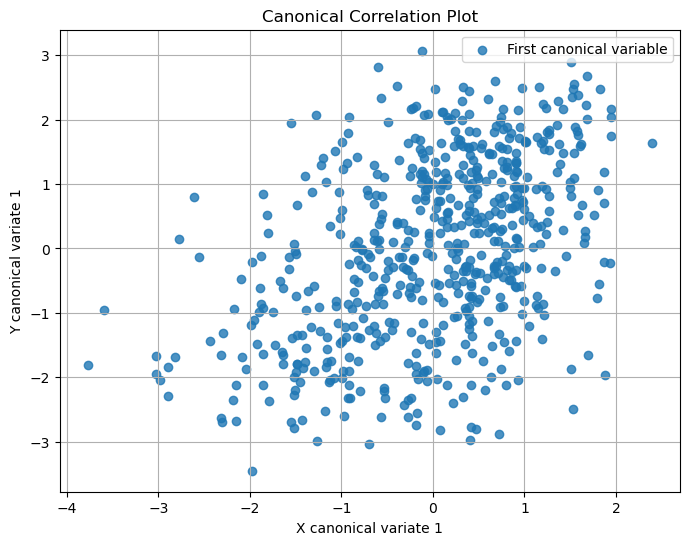

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(X_c[:, 0], Y_c[:, 0], label="First canonical variable", alpha=0.8)
plt.xlabel("X canonical variate 1")
plt.ylabel("Y canonical variate 1")
plt.title("Canonical Correlation Plot")
plt.legend()
plt.grid(True)
plt.show()

## Interpretation
The canonical correlation analysis revealed a correlation of 0.4464, reflecting a moderate positive association between the psychological and academic variable sets.
Within the psychological variables, Locus of Control showed the highest positive weight (0.8768), making it the most influential contributor, followed by Motivation (0.4480). Self-Concept had a small negative weight (–0.1748), indicating a minor inverse contribution.
Among the academic variables, Writing exhibited the strongest positive weight (0.7431), followed by Reading (0.6172) and Math (0.2533), while Science displayed a very small negative weight (–0.0511), suggesting negligible influence.
Overall, the results indicate that higher Locus of Control and Motivation are moderately linked to better performance in Writing and Reading skills.